In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns

In [6]:
x0=np.load('../Data/ML/qutrit/raw0.npy')
y0=np.zeros(x0.shape[0])
x1=np.load('../Data/ML/qutrit/raw1.npy')
y1=np.ones(x1.shape[0])
x2=np.load('../Data/ML/qutrit/raw2.npy')
y2=np.array((2,)*x2.shape[0])
x1_0=np.load('../Data/ML/qutrit/raw1_0.npy')
y1_0=np.array((3,)*x1_0.shape[0])
x2_1=np.load('../Data/ML/qutrit/raw2_1.npy')
y2_1=np.array((4,)*x2_1.shape[0])
x2_0=np.load('../Data/ML/qutrit/raw2_0.npy')
y2_0=np.array((5,)*x2_0.shape[0])

In [7]:
x = np.concatenate((x0,x1,x2,x1_0,x2_1,x2_0), axis=0)
y = np.concatenate((y0,y1,y2,y1_0,y2_1,y2_0), axis=0)

In [8]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.40, random_state=45)
# np.set_printoptions(threshold=np.inf)
# print(y_test)

In [9]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 0.49916805324459235,
 1: 0.5309734513274337,
 2: 0.5357142857142857,
 3: 15.0,
 4: 8.333333333333334,
 5: 16.666666666666668}

In [10]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(31,)),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_cat = to_categorical(y_train, 6)
y_test_cat = to_categorical(y_test, 6)
model.fit(x_train, y_train_cat, epochs=100, batch_size=32, class_weight=class_weights_dict, validation_data=(x_test, y_test_cat))

# Predict on the test data
y_pred_cat = model.predict(x_test)
y_pred = np.argmax(y_pred_cat, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1}")

# Optionally, print detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

2024-07-08 08:50:40.077601: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
57/57 [==============================] - 1s 7ms/step - loss: 1.4339 - accuracy: 0.7178 - val_loss: 0.8639 - val_accuracy: 0.8067
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.9815 - accuracy: 0.7878 - val_loss: 0.6513 - val_accuracy: 0.8183
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.7963 - accuracy: 0.8122 - val_loss: 0.6176 - val_accuracy: 0.7983
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.8017 - val_loss: 0.5935 - val_accuracy: 0.7775
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.7861 - val_loss: 0.5495 - val_accuracy: 0.8067
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6232 - accuracy: 0.8289 - val_loss: 0.6824 - val_accuracy: 0.6733
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.5988 - accuracy: 0.7889 - val_loss: 0.5050 - val_accuracy: 0.8367
Epoch 8/100
5

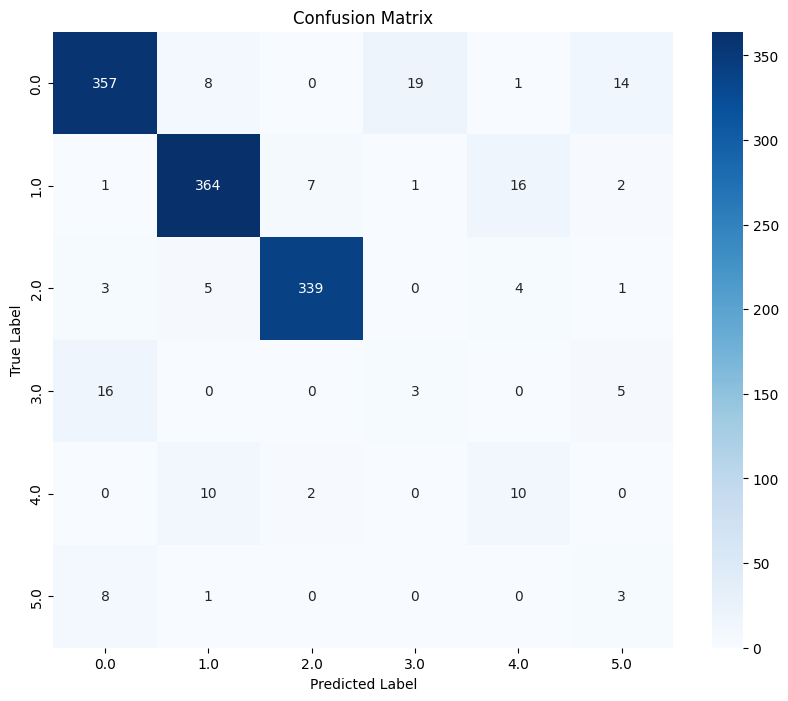

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()